# Home Score Card Model

Home Credit Indonesia strives to make predictions through alternative data using various statistical methods and Machine Learning. The prediction model is expected to be able to determine which customers who are able to repay are not rejected when applying for a loan, and loans can be given with a principal, maturity, and repayment calendar that will motivate customers to succeed.

**Objective**
1. Identify customers who have difficulty in repaying loans.
2. Predict customers who have the capacity to repay their loans.

**Goals**
1. Perform data cleaning, data visualization and build prediction models with machine learning.
2. Predict customer repayment ability with the best machine learning model.
3. Provide recommendations to the company to increase customer success in the next loan application.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

**Submission**

In [6]:
submission = pd.read_excel('C:\\Users\\Administrator\\Documents\\Rakamin\\submission_lgbm_us.xlsx')
submission.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,1
3,100028,0
4,100038,0


In [7]:
submission.TARGET.value_counts()

TARGET
0    41330
1     7414
Name: count, dtype: int64

**Data_Test**

In [11]:
data_test = pd.read_csv('C:\\Users\\Administrator\\Documents\\Rakamin\\home-credit-default-risk\\application_test.csv')
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Merge Submission with Data Test

In [12]:
merge_predict = pd.merge(
    left=submission,
    right=data_test,
    how="left",
    left_on="SK_ID_CURR",
    right_on="SK_ID_CURR"
)
merge_predict.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,1,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning Data

In [13]:
## function for looking precentage of missing values in df
def miss_percent(df):
    result = (df.isnull().sum().sum() / df.size) * 100
    return result

#function for looking precentage of missing values in columns
def in_col(df):
    percent = df.isnull().sum() / len(df)
    result_df = pd.DataFrame({'column_index': percent.index, 'percentage': percent.values})
    result_df = result_df.sort_values(by='percentage', ascending=False)

    return result_df

In [14]:
miss_percent(merge_predict)

23.616509001191908

In [15]:
merge_miss = in_col(merge_predict)

In [16]:
merge_miss.head()

,column_index,percentage
76,COMMONAREA_MEDI,0.687161
48,COMMONAREA_AVG,0.687161
62,COMMONAREA_MODE,0.687161
84,NONLIVINGAPARTMENTS_MEDI,0.684125
56,NONLIVINGAPARTMENTS_AVG,0.684125


In [17]:
merge_predict['CODE_GENDER'] = np.where(merge_predict['CODE_GENDER'] == 'XNA', np.nan, merge_predict['CODE_GENDER'])
merge_predict['NAME_INCOME_TYPE'] = np.where(merge_predict['NAME_INCOME_TYPE'] == 'Maternity leave', np.nan, merge_predict['NAME_INCOME_TYPE'])
merge_predict['NAME_FAMILY_STATUS'] = np.where(merge_predict['NAME_FAMILY_STATUS'] == 'Unknown', np.nan, merge_predict['NAME_FAMILY_STATUS'])

In [19]:
# impute missing values with median for numerical features
# impute missing values with mode for categorical features

cat_columns = merge_predict.select_dtypes(include=['object']).columns.tolist()
int_columns = merge_predict.select_dtypes(include=['int64','float64']).columns.tolist()

for col in merge_predict:
    if merge_predict[col].isnull().any():
        if(col in cat_columns):
            merge_predict[col]=merge_predict[col].fillna(merge_predict[col].mode()[0])
        else:
            merge_predict[col]=merge_predict[col].fillna(merge_predict[col].median())

In [20]:
miss_percent(merge_predict)

0.0

# Exploratory Data Analysis

In [23]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.set_theme(context="talk")
sns.set_style("whitegrid", {'axes.edgecolor': '.6','axes.grid': False,'xtick.bottom': True,'ytick.left': True})

In [21]:
merge_predict.shape

(48744, 122)

In [22]:
for col in merge_predict.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

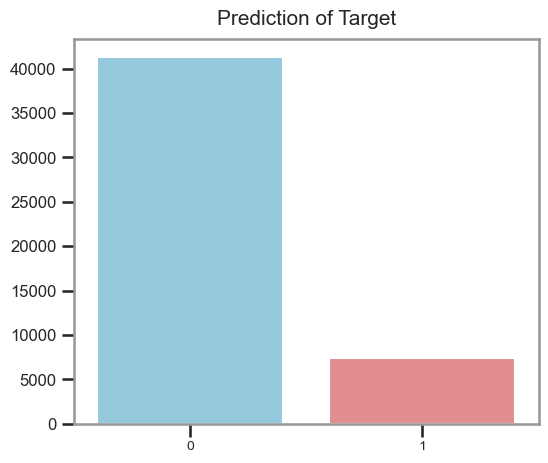

In [24]:
sns.countplot(x='TARGET', data=merge_predict, palette=['skyblue', 'lightcoral'])
plt.title("Prediction of Target", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

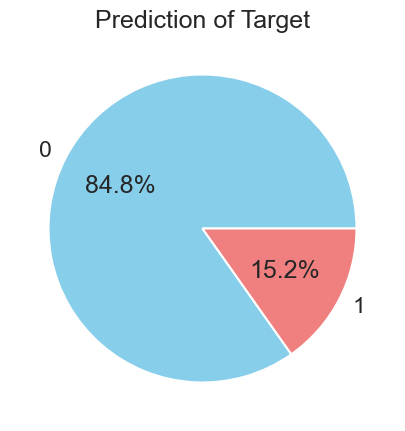

In [25]:
merge_predict.TARGET.value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Prediction of Target')
plt.ylabel(None)
plt.show()

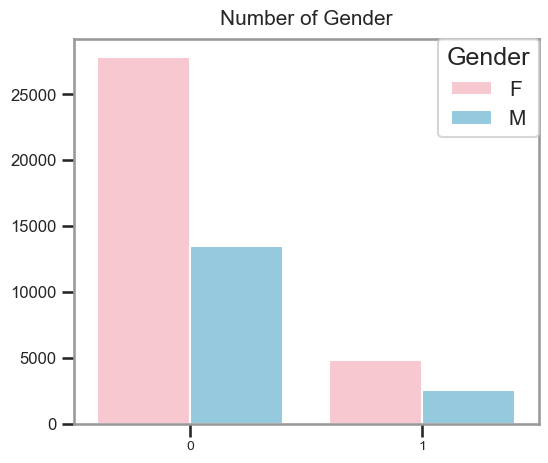

In [35]:
sns.countplot(x='TARGET',hue='CODE_GENDER', palette=['pink','skyblue'], data=merge_predict)
plt.title("Number of Gender", loc="center",  fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.legend(title="Gender", bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0., ncol=1, fontsize='small')
plt.show()

The visualization results show that females loan more credit than males but have no trouble repaying it.

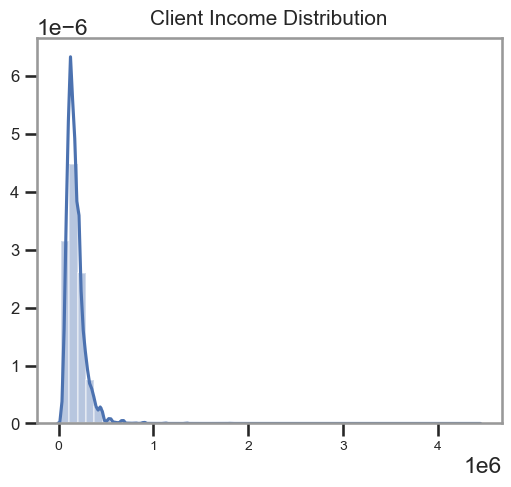

In [100]:
sns.distplot(merge_predict['AMT_INCOME_TOTAL'])
plt.title("Client Income Distribution", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

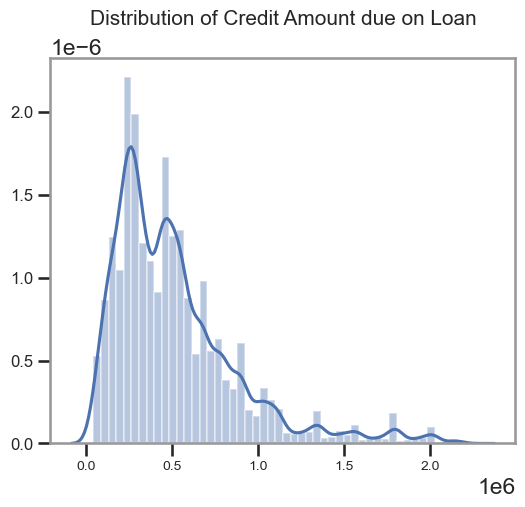

In [37]:
sns.distplot(merge_predict['AMT_CREDIT'])
plt.title("Distribution of Credit Amount due on Loan", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

The number of client credits is mostly in range 250000 - 500000

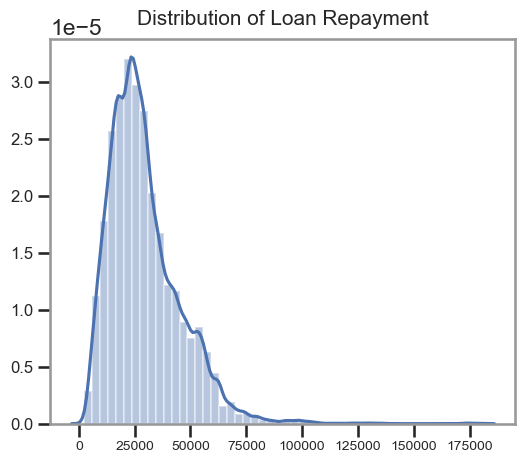

In [38]:
sns.distplot(merge_predict['AMT_ANNUITY'])
plt.title("Distribution of Loan Repayment", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

The average client only pays a balance of no more than 75000.

In [70]:
merge_predict[merge_predict.CODE_GENDER == 'F']['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False)

NAME_INCOME_TYPE
Working                 15252
Pensioner                7656
Commercial associate     7199
State servant            2569
Businessman                 1
Student                     1
Name: count, dtype: int64

In [69]:
merge_predict[merge_predict.CODE_GENDER == 'M']['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False)

NAME_INCOME_TYPE
Working                 9281
Commercial associate    4203
Pensioner               1617
State servant            963
Unemployed                 1
Student                    1
Name: count, dtype: int64

In [71]:
female = merge_predict[merge_predict.CODE_GENDER == 'F']['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False)
male = merge_predict[merge_predict.CODE_GENDER == 'M']['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False)

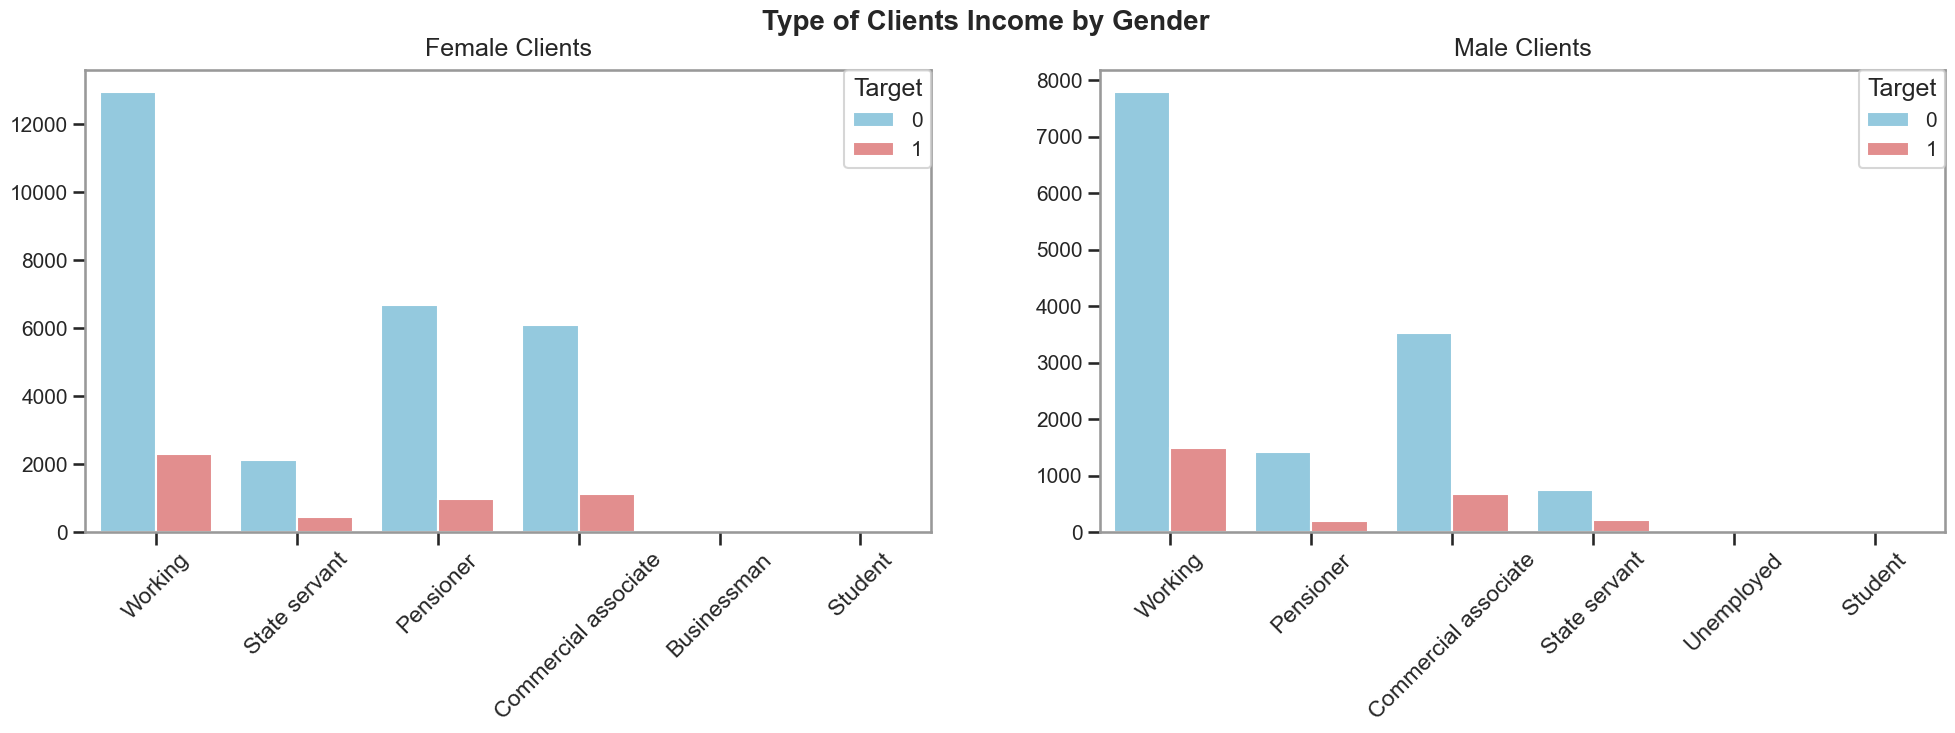

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.countplot(x='NAME_INCOME_TYPE', data=merge_predict[merge_predict.CODE_GENDER == 'F'], hue='TARGET',palette=['skyblue', 'lightcoral'], ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Female Clients", pad=10, loc="center", fontsize=18)
ax[0].legend(title="Target", bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0., ncol=1, fontsize='small')
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].tick_params(axis ='y', labelsize=15)

sns.countplot(x='NAME_INCOME_TYPE', data=merge_predict[merge_predict.CODE_GENDER == 'M'],hue='TARGET',palette=['skyblue', 'lightcoral'], ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Male Clients", pad=10, loc="center", fontsize=18)
ax[1].legend(title="Target", bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0., ncol=1, fontsize='small')
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='y', labelsize=15)


plt.suptitle("Type of Clients Income by Gender", fontsize=20, fontweight='bold')
plt.show()

In [81]:
age_0 = merge_predict.DAYS_BIRTH[merge_predict.TARGET == 0].values/-365
age_1 = merge_predict.DAYS_BIRTH[merge_predict.TARGET == 1].values/-365

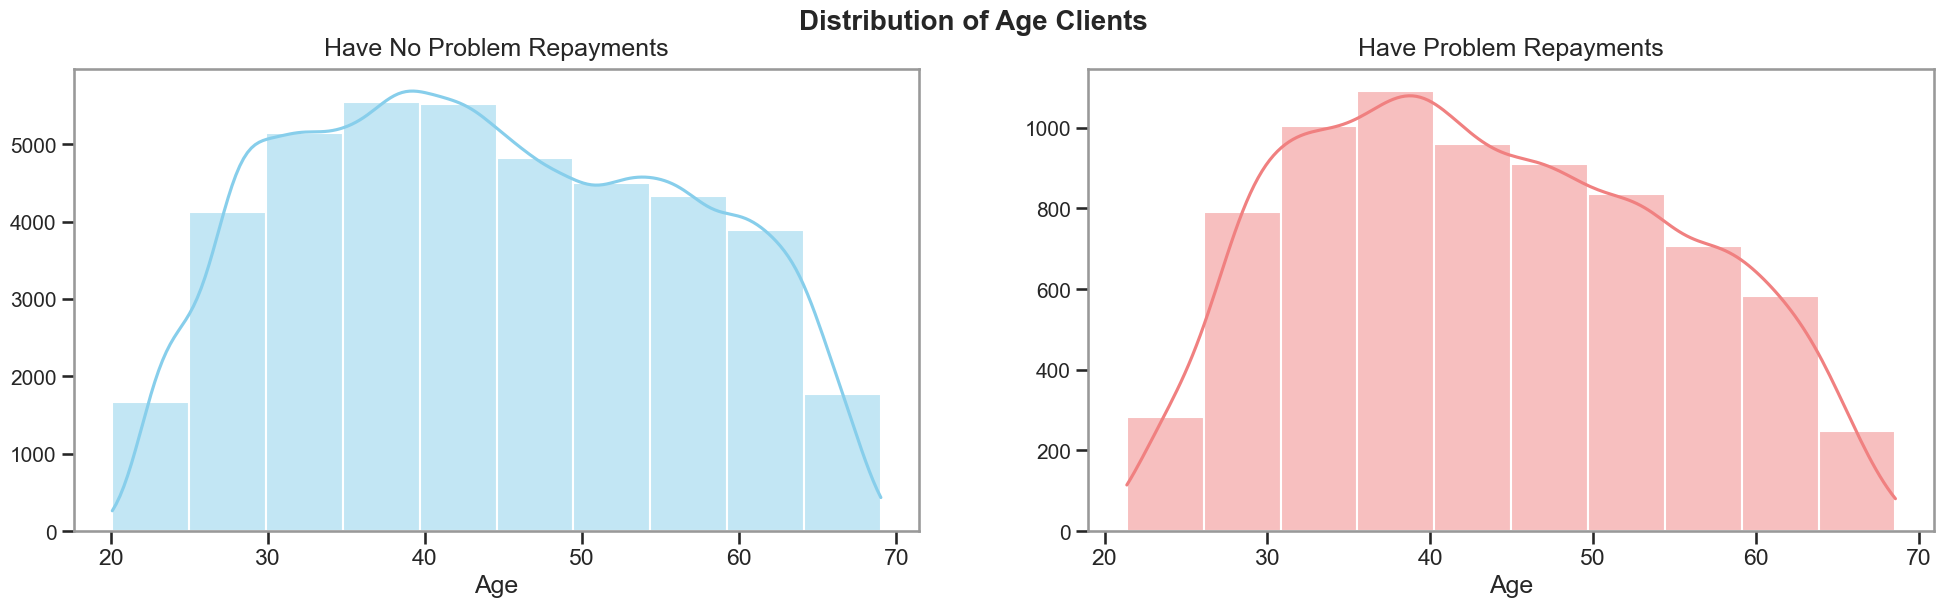

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.histplot(age_0, bins=10, kde=True, color='skyblue', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel('Age')
ax[0].set_title("Have No Problem Repayments", pad=10, loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.histplot(age_1, bins=10, kde=True, color='lightcoral', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('Age')
ax[1].set_title("Have Problem Repayments", pad=10, loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)


plt.suptitle("Distribution of Age Clients", fontsize=20, fontweight='bold')
plt.show()

Clients who have no payments dificulties are client in the range of 35 - 45 years and Clients who have payments dificulties are client mostly in range 35- 40 years

# Recomendation

1. Put a limit on the age that can take a loan, between 30 - 50 so that loan repayment can be smoother
2. If there are underage clients making loans, provide special conditions so that loan payments can be made immediately.
3. For clients who have income only as casual workers, please give the option to make a loan but with a certain loan limit.